In [1]:
import trino
import pandas as pd
import numpy as np

In [5]:
import trino
conn = trino.dbapi.connect(host='192.168.1.71',port=8083,user='trino',catalog='tpch', schema="tiny")
cur = conn.cursor()
cur.execute('show tables')
c= cur.fetchall()
c

[['customer'],
 ['lineitem'],
 ['nation'],
 ['orders'],
 ['part'],
 ['partsupp'],
 ['region'],
 ['supplier']]

Customer: This table contains information about the wholesale supplier's customers. It has a one-to-many relationship with the orders table, as each customer can place multiple orders.

Orders: This table contains information about the orders placed by the wholesale supplier's customers. It has a many-to-one relationship with the customer table, as each order is placed by a single customer.

Lineitem: This table contains information about the line items in each order. It has a many-to-one relationship with both the orders table and the partsupp table, as each line item is part of a single order and is supplied by a single supplier.

Part: This table contains information about the parts sold by the wholesale supplier. It has a one-to-many relationship with the partsupp table, as each part can be supplied by multiple suppliers.

Partsupp: This table contains information about the suppliers of each part. It has a many-to-one relationship with both the part table and the supplier table, as each partsupp record refers to a single part and a single supplier.

Supplier: This table contains information about the suppliers of the parts. It has a one-to-many relationship with the partsupp table, as each supplier can supply multiple parts.

Nation: This table contains information about the countries in which the suppliers and customers are located. It has a one-to-many relationship with the supplier and customer tables, as each supplier and customer is located in a single country.

Region: This table contains information about the regions in which the countries are located. It has a one-to-many relationship with the nation table, as each nation is located in a single region.

# Lineitem Table

In [6]:
cur.execute('SELECT * FROM lineitem')
m = cur.fetchall()

In [7]:
dfl=pd.DataFrame(m,columns=[i[0] for i in cur.description])

In [8]:
dfl

,orderkey,partkey,suppkey,linenumber,quantity,extendedprice,discount,tax,returnflag,linestatus,shipdate,commitdate,receiptdate,shipinstruct,shipmode,comment
0,1,1552,93,1,17.0,24710.35,0.04,0.02,N,O,1996-03-13,1996-02-12,1996-03-22,DELIVER IN PERSON,TRUCK,egular courts above the
1,1,674,75,2,36.0,56688.12,0.09,0.06,N,O,1996-04-12,1996-02-28,1996-04-20,TAKE BACK RETURN,MAIL,ly final dependencies: slyly bold
2,1,637,38,3,8.0,12301.04,0.10,0.02,N,O,1996-01-29,1996-03-05,1996-01-31,TAKE BACK RETURN,REG AIR,"riously. regular, express dep"
3,1,22,48,4,28.0,25816.56,0.09,0.06,N,O,1996-04-21,1996-03-30,1996-05-16,NONE,AIR,lites. fluffily even de
4,1,241,23,5,24.0,27389.76,0.10,0.04,N,O,1996-03-30,1996-03-14,1996-04-01,NONE,FOB,pending foxes. slyly re
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60170,39975,1913,2,4,29.0,52632.39,0.02,0.06,N,O,1998-10-26,1998-08-18,1998-10-29,DELIVER IN PERSON,TRUCK,s across the slyly regular din
60171,39975,1169,70,5,38.0,40666.08,0.06,0.06,N,O,1998-09-09,1998-09-04,1998-10-09,DELIVER IN PERSON,TRUCK,o beans are slyly final id
60172,39975,1388,65,6,3.0,3868.14,0.00,0.05,N,O,1998-07-04,1998-08-24,1998-07-22,NONE,AIR,"e the final, final package"
60173,40000,1612,36,1,50.0,75680.50,0.08,0.01,A,F,1995-02-11,1995-03-29,1995-03-07,NONE,TRUCK,blithely slyly


In [9]:
dfl.describe()

,orderkey,partkey,suppkey,linenumber,quantity,extendedprice,discount,tax
count,60175.000000,60175.000000,60175.000000,60175.000000,60175.000000,60175.000000,60175.000000,60175.000000
mean,29958.613594,1002.701321,50.535970,3.004271,25.527661,35765.513261,0.049930,0.040225
std,17299.239820,575.677416,28.862957,1.734026,14.406573,21844.234985,0.031612,0.025774
min,1.000000,1.000000,1.000000,1.000000,1.000000,904.000000,0.000000,0.000000
25%,14981.500000,504.000000,26.000000,2.000000,13.000000,17557.440000,0.020000,0.020000
50%,29888.000000,1004.000000,50.000000,3.000000,25.000000,34245.120000,0.050000,0.040000
75%,44932.000000,1500.500000,76.000000,4.000000,38.000000,51354.910000,0.080000,0.060000
max,60000.000000,2000.000000,100.000000,7.000000,50.000000,94949.500000,0.100000,0.080000


By understanding the relationships between these columns,
you can perform various analyses on the lineitem table, 
such as calculating the total sales revenue for each supplier, 
or identifying the most popular parts sold by a specific supplier.

In [10]:
dfl.isnull().sum() 

orderkey         0
partkey          0
suppkey          0
linenumber       0
quantity         0
extendedprice    0
discount         0
tax              0
returnflag       0
linestatus       0
shipdate         0
commitdate       0
receiptdate      0
shipinstruct     0
shipmode         0
comment          0
dtype: int64

In [11]:
dfl['shipmode'].unique()


array(['TRUCK', 'MAIL', 'REG AIR', 'AIR', 'FOB', 'RAIL', 'SHIP'],
      dtype=object)

In [12]:
a=dfl[dfl['shipmode'] == 'TRUCK'].shape[0]
a

8710

In [13]:
b=dfl[dfl['shipmode'] == 'MAIL'].shape[0]
b

8669

In [14]:
c=dfl[dfl['shipmode'] == 'REG AIR'].shape[0]
c

8616

In [15]:
d=dfl[dfl['shipmode'] == 'AIR'].shape[0]
d

8491

In [16]:
e=dfl[dfl['shipmode'] == 'FOB'].shape[0]
e

8641

In [17]:
f=dfl[dfl['shipmode'] == 'RAIL'].shape[0]
f

8566

In [18]:
g=dfl[dfl['shipmode'] == 'SHIP'].shape[0]
g

8482

In [19]:
#shipdate	commitdate	receiptdate

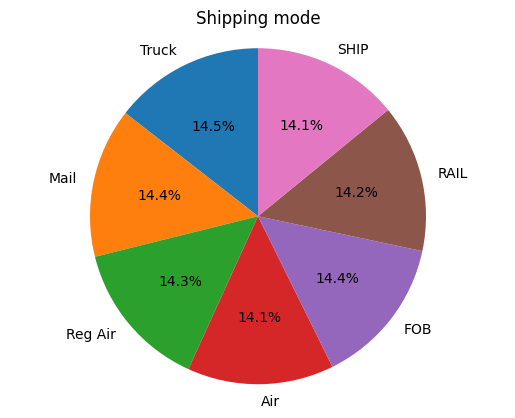

In [20]:
import matplotlib.pyplot as plt

labels = ['Truck','Mail','Reg Air','Air','FOB','RAIL','SHIP']
sizes = [a,b,c,d,e,f,g]

fig1, dfl = plt.subplots()
dfl.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
dfl.axis('equal') 
dfl.set_title("Shipping mode")

plt.show()

In [21]:
df_counts = dfc[['mktsegment', 'nationkey','acctbal']].value_counts().reset_index(name='count')
df_grouped = df_counts.groupby('nationkey').sum().reset_index()
df_grouped

NameError: name 'dfc' is not defined

In [ ]:
dfl['receiptdate'] = pd.to_datetime(dfl['receiptdate'])

# Create a new column with only the year
dfl['receiptdate_year'] = dfl['receiptdate'].dt.year
dfl

In [ ]:
import seaborn as sns
fig = plt.figure(figsize=(15,5))
sns.histplot(data=dfl,x='receiptdate_year',hue='quantity',kde=True,palette='Set2',alpha=0.6)

In [22]:
fig = plt.figure(figsize=(15,5))
sns.histplot(data=dfl,x='year',hue='quantity',kde=True,palette='Set2',alpha=0.6)

NameError: name 'sns' is not defined

<Figure size 1500x500 with 0 Axes>

In [23]:
day_of_the_week_avg_usage_data = dfl.groupby(pd.Grouper(key="receiptdate_year"))
day_of_the_week_avg_usage_data.head()
day_of_the_week_avg_usage_data.plot(y=["discount","tax"], kind="line")

AttributeError: 'Axes' object has no attribute 'groupby'

# Supplier Table

In [24]:
cur.execute('SELECT * FROM supplier')
m = cur.fetchall()
dfs=pd.DataFrame(m,columns=[i[0] for i in cur.description])

In [25]:
dfs

,suppkey,name,address,nationkey,phone,acctbal,comment
0,1,Supplier#000000001,"N kD4on9OM Ipw3,gf0JBoQDd7tgrzrddZ",17,27-918-335-1736,5755.94,each slyly above the careful
1,2,Supplier#000000002,"89eJ5ksX3ImxJQBvxObC,",5,15-679-861-2259,4032.68,slyly bold instructions. idle dependen
2,3,Supplier#000000003,"q1,G3Pj6OjIuUYfUoH18BFTKP5aU9bEV3",1,11-383-516-1199,4192.40,blithely silent requests after the express dep...
3,4,Supplier#000000004,Bk7ah4CK8SYQTepEmvMkkgMwg,15,25-843-787-7479,4641.08,riously even requests above the exp
4,5,Supplier#000000005,Gcdm2rJRzl5qlTVzc,11,21-151-690-3663,-283.84,. slyly regular pinto bea
...,...,...,...,...,...,...,...
95,96,Supplier#000000096,"Lbxp3WIipye o2wZme1i9iJx,xTt1Mp",12,22-888-654-7193,3437.24,efully unusual excuses wake fluffily regular t...
96,97,Supplier#000000097,MrCQha2G6ndX1fp6CA,4,14-618-678-1789,6642.22,"s, regular accounts. furiously bold ideas u"
97,98,Supplier#000000098,ogHn8dpXB5Q,21,31-914-775-1978,5873.07,esias use slyly under the ironic foxes. re
98,99,Supplier#000000099,"4SxkTHG28nZrtT0,MnVF9H",18,28-272-909-1617,3671.34,nic dependencies dazzle flu


In [26]:
df_counts = dfs[['suppkey', 'nationkey','acctbal']].value_counts().reset_index(name='count')
df_counts

,suppkey,nationkey,acctbal,count
0,1,17,5755.94,1
1,64,24,1309.70,1
2,74,20,4170.51,1
3,73,16,3793.13,1
4,72,18,7014.50,1
...,...,...,...,...
95,31,16,5916.91,1
96,30,16,8080.14,1
97,29,1,-811.62,1
98,28,0,-891.99,1


In [27]:
# Group by 'nationkey' and calculate total count and average account balance
df_counts = dfs[['suppkey', 'nationkey', 'acctbal']].value_counts().reset_index(name='count')
df_grouped = df_counts.groupby('nationkey').agg({'count': 'sum', 'acctbal': 'mean'})

# Display the results
print(df_grouped)

           count      acctbal
nationkey                    
0              3  3765.396667
1              3  3853.486667
2              2  5918.320000
3              3  5297.970000
4              6  3833.046667
5              3  3606.270000
6              2  7855.070000
7              5  7172.508000
8              5  3693.856000
9              5  4453.186000
10             2  2769.840000
11             2  1401.145000
12             4  3527.665000
13             1  2371.510000
14             6  2597.551667
15             2  6915.450000
16             7  3522.862857
17             4  3284.720000
18             7  3137.151429
19             5  3129.948000
20             1  4170.510000
21             6  3091.048333
22             5  3496.366000
23             3  4277.600000
24             8  5192.165000


#  customer table

In [28]:
cur.execute('SELECT * FROM customer')
m = cur.fetchall()
dfc=pd.DataFrame(m,columns=[i[0] for i in cur.description])

In [29]:
dfc

,custkey,name,address,nationkey,phone,acctbal,mktsegment,comment
0,501,Customer#000000501,"lzkYA5C6wa,wX",13,23-867-672-1331,1909.35,FURNITURE,ual deposits wake. quickly ironic platelets al...
1,502,Customer#000000502,nouAF6kednGsWEhQYyVpSnnPt,11,21-405-590-9919,1378.67,HOUSEHOLD,"even asymptotes haggle. final, unusual theodol..."
2,503,Customer#000000503,"7xCLYGLCpFU,toJBIPIrJbLIuLok81h IxK ae5Z",20,30-441-755-3094,3213.66,MACHINERY,even deposits haggle. packages i
3,504,Customer#000000504,"2GuRx4pOLEQWU7fJOa, DYiK8IuMsXRLO5D 0",10,20-916-264-7594,0.51,FURNITURE,slyly final theodolites are across the carefully
4,505,Customer#000000505,"MAUkwAyEvg61RlCMomspMs0WzYa,Ns",2,12-530-647-8313,6557.51,HOUSEHOLD,mptotes haggle around the theodolites. furious...
...,...,...,...,...,...,...,...,...
1495,496,Customer#000000496,Y8oYLlHme6Z4fEzkTu,12,22-173-644-7922,8174.82,MACHINERY,quickly bold packages. decoys among the blith...
1496,497,Customer#000000497,0 qRRXAxUbo1J KDwDMjFde5fXDwn,23,33-937-724-3506,2191.59,BUILDING,fluffy ideas detect carefully
1497,498,Customer#000000498,"1Wnja9i7KAC3HxS5yATK,In8Q6AHcEUr0f5Tp",19,29-210-810-1479,3945.64,BUILDING,yly pending requests according to the slyly sp...
1498,499,Customer#000000499,m1hO3VXQVbwTbJ99Hw,14,24-387-817-9149,4293.76,HOUSEHOLD,old sentiments cajole carefully among the blit...


In [30]:
dfc['nationkey'].value_counts()

10    72
15    72
3     69
2     68
20    67
12    67
4     66
9     66
19    64
16    62
0     61
8     60
22    59
1     59
11    58
18    58
21    58
7     57
5     57
17    56
23    56
13    54
14    50
24    48
6     36
Name: nationkey, dtype: int64

In [31]:
# Group by 'nationkey' and calculate total count and average account balance
df_counts = dfc[['mktsegment', 'nationkey', 'acctbal']].value_counts().reset_index(name='count')
df_grouped = df_counts.groupby('nationkey').agg({'count': 'sum', 'acctbal': 'mean'})

# Display the results
print(df_grouped)

           count      acctbal
nationkey                    
0             61  4068.527705
1             59  4850.904068
2             68  3635.298088
3             69  4116.115797
4             66  4128.486970
5             57  3539.666140
6             36  3907.311111
7             57  4280.099298
8             60  4566.697000
9             66  4971.411061
10            72  4206.755139
11            58  4613.156034
12            67  4962.463881
13            54  4185.999630
14            50  4901.110000
15            72  5484.469861
16            62  4584.807258
17            56  4301.278571
18            58  5032.121552
19            64  3941.036250
20            67  5495.691940
21            58  4712.100172
22            59  4321.541017
23            56  3828.290000
24            48  4297.535833


# Nation Table

In [32]:
cur.execute('SELECT * FROM nation')
m = cur.fetchall()
dfn=pd.DataFrame(m,columns=[i[0] for i in cur.description])

In [33]:
dfn

,nationkey,name,regionkey,comment
0,0,ALGERIA,0,haggle. carefully final deposits detect slyly...
1,1,ARGENTINA,1,al foxes promise slyly according to the regula...
2,2,BRAZIL,1,y alongside of the pending deposits. carefully...
3,3,CANADA,1,"eas hang ironic, silent packages. slyly regula..."
4,4,EGYPT,4,y above the carefully unusual theodolites. fin...
5,5,ETHIOPIA,0,ven packages wake quickly. regu
6,6,FRANCE,3,"refully final requests. regular, ironi"
7,7,GERMANY,3,"l platelets. regular accounts x-ray: unusual, ..."
8,8,INDIA,2,ss excuses cajole slyly across the packages. d...
9,9,INDONESIA,2,slyly express asymptotes. regular deposits ha...


# Orders Table

In [34]:
cur.execute('SELECT * FROM orders')
m = cur.fetchall()
dfo=pd.DataFrame(m,columns=[i[0] for i in cur.description])

In [35]:
dfo

,orderkey,custkey,orderstatus,totalprice,orderdate,orderpriority,clerk,shippriority,comment
0,40001,712,F,111953.06,1995-02-25,3-MEDIUM,Clerk#000000197,0,"g furiously regular, express forges. final th"
1,40002,1064,F,46465.82,1993-11-09,2-HIGH,Clerk#000000965,0,usly slyly special packages. ca
2,40003,515,F,226742.80,1994-03-01,3-MEDIUM,Clerk#000000723,0,unts hang furiously. regular pinto beans boost...
3,40004,44,O,102626.43,1997-03-17,2-HIGH,Clerk#000000455,0,"fully bold requests after the special, ironic ..."
4,40005,1406,F,110493.15,1993-07-26,2-HIGH,Clerk#000000829,0,s serve. fluffily ironic frays haggle. quickly...
...,...,...,...,...,...,...,...,...,...
14995,19972,65,F,127283.09,1992-06-17,1-URGENT,Clerk#000000581,0,r epitaphs. pending instructions cajol
14996,19973,163,O,58906.92,1996-01-14,5-LOW,Clerk#000000607,0,pecial pinto beans wake evenly since the caref...
14997,19974,989,F,182874.04,1993-11-04,2-HIGH,Clerk#000000678,0,ies sleep regularly ideas. ideas sleep. furiou...
14998,19975,1255,F,163658.94,1994-04-11,4-NOT SPECIFIED,Clerk#000000026,0,e quickly according to


# Part Table

In [36]:
cur.execute('SELECT * FROM part')
m = cur.fetchall()
dfp=pd.DataFrame(m,columns=[i[0] for i in cur.description])

In [37]:
dfp

,partkey,name,mfgr,brand,type,size,container,retailprice,comment
0,667,wheat ghost honeydew plum grey,Manufacturer#4,Brand#43,MEDIUM PLATED STEEL,42,MED JAR,1567.66,ly pending packages.
1,668,honeydew pink dodger cream dim,Manufacturer#2,Brand#22,SMALL ANODIZED NICKEL,10,LG PACK,1568.66,odolites. furio
2,669,khaki metallic plum smoke hot,Manufacturer#1,Brand#11,STANDARD BRUSHED TIN,37,MED BAG,1569.66,bold deposi
3,670,slate black smoke pale moccasin,Manufacturer#1,Brand#12,ECONOMY PLATED COPPER,24,LG DRUM,1570.67,es use fluffily unusu
4,671,powder metallic salmon slate chocolate,Manufacturer#5,Brand#53,SMALL PLATED STEEL,31,JUMBO BOX,1571.67,es. s
...,...,...,...,...,...,...,...,...,...
1995,1996,bisque khaki thistle orange medium,Manufacturer#2,Brand#22,SMALL ANODIZED STEEL,22,JUMBO CASE,1897.99,package
1996,1997,coral rose drab cream midnight,Manufacturer#3,Brand#32,STANDARD BURNISHED NICKEL,15,MED JAR,1898.99,ckages are
1997,1998,steel plum violet almond mint,Manufacturer#2,Brand#25,LARGE BURNISHED TIN,37,WRAP PACK,1899.99,deas
1998,1999,frosted cornflower ghost lime smoke,Manufacturer#2,Brand#25,LARGE BURNISHED BRASS,35,SM PKG,1900.99,l ideas! carefully ru


# Partsupp Table

In [38]:
cur.execute('SELECT * FROM partsupp')
m = cur.fetchall()
dfps=pd.DataFrame(m,columns=[i[0] for i in cur.description])

In [39]:
dfps

,partkey,suppkey,availqty,supplycost,comment
0,667,68,9129,490.65,ges haggle. stealthy accounts alongside of the...
1,667,99,6304,830.76,es at the carefully pending deposits are silent a
2,667,30,1626,723.63,ugouts cajole carefully. even packages about t...
3,667,61,1766,324.09,ng accounts after the unusual platelets lose a...
4,668,69,4931,620.24,ole evenly about the regular ideas; unusual th...
...,...,...,...,...,...
7995,665,59,1234,130.02,ages boost carefully. quickly pending foxes na...
7996,666,67,9860,596.08,efully bold foxes are furiously. bold packages...
7997,666,98,8372,451.56,"he blithely bold requests. regular, blithe dep..."
7998,666,29,1000,96.36,h slyly among the quickly even epitaphs. regul...


# Region Table

In [40]:
cur.execute('SELECT * FROM region')
m = cur.fetchall()
dfr=pd.DataFrame(m,columns=[i[0] for i in cur.description])

In [41]:
dfr

,regionkey,name,comment
0,0,AFRICA,lar deposits. blithely final packages cajole. ...
1,1,AMERICA,"hs use ironic, even requests. s"
2,2,ASIA,ges. thinly even pinto beans ca
3,3,EUROPE,ly final courts cajole furiously final excuse
4,4,MIDDLE EAST,uickly special accounts cajole carefully blith...


In [ ]:
np.

In [ ]:
#This dashboard contains sample data for you to play with. You can view it, search it, and interact with the visualizations. 